In [ ]:
import math
def is_prime(n):
  if n == 2 or n == 3: return True
  if n < 2 or n % 2 == 0: return False
  if n < 9: return True
  if n % 3 == 0: return False
  r = math.isqrt(n)
  f = 5
  while f <= r:
    if n % f == 0: return False
    if n % (f + 2) == 0: return False
    f += 6
  return True

def bipartite(G, N, M, banned) :
  def dfs(x) :
    if vis[x]: return False

    vis[x] = True
    for y in G[x]:
      if y == banned: continue #banned로 지정된 index는 선택하지 않는다
      if sel[y] == -1 :
        sel[y] = x
        return True
      
    for y in G[x] :
      if y == banned: continue
      if dfs(sel[y]):
        sel[y] = x
        return True
    return False

  sel = [-1] * M
  res = 0
  for i in range(N) :
    vis = [False] * N
    if dfs(i) : res += 1
  return res, sel

def sol() :
  N = int(input())
  L = [*map(int, input().split())]
  odd = []
  even = []
  is_first_odd = False
  if L[0] & 1 :
    odd.append(L[0])
    is_first_odd = True
  else: 
    even.append(L[0])

  for i, v in enumerate(L[1:], 1) :
    if v & 1 :
      odd.append(v)
    else :
      even.append(v)
    
  if len(odd) != len(even) : #두 집합의 크기가 다르다면 모든 수를 짝지을 수 없다. (홀수끼리 더하거나 짝수끼리 더한 것은 짝수이며, 소수가 아니기 때문)
    return print(-1)
  
  V = N // 2
  G = [[] for _ in range(V)]
  for i, v in enumerate(odd if is_first_odd else even) :
    for j, u in enumerate(even if is_first_odd else odd) :
      if is_prime(v + u) :
        G[i].append(j)
  
  select = G[0].copy()
  G[0] = []
  ans = []
  for i in select :
    res, sel = bipartite(G, V, V, i)
    if res == V - 1 :
      ans.append(even[i] if is_first_odd else odd[i])
  
  if not ans : return print(-1)
  print(*sorted(ans))

sol()

- 각 숫자의 쌍을 어떻게 구현할지가 가장 막막했던 문제. 알고보니 수학적 아이디어를 이용해 이분 그래프를 둘로 나눌 수 있었어야 했다.
  - 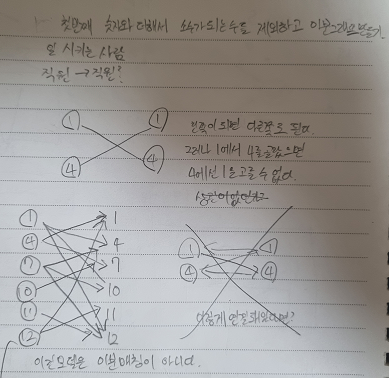

### 풀이
1. 모든 자연수를 홀수 그룹과 짝수 그룹으로 나눈다.
2. 첫번째 숫자가 속한 그룹(홀수 or 짝수)`X`에서 반대쪽 그룹으로 갈 수 있는 모든 조합을 시도해보고 그 둘을 더한 값이 소수이면 간선을 구성한다.
3. `X`에 속한 숫자 각각을 매칭한 것으로 가정하고, 나머지 정점과 간선들에 대해 이분 매칭을 수행하여 최대 매칭을 구한다.
    - 이때 짝수/홀수 리스트의 길이 - 1이면 모든 쌍을 구성할 수 있다는 의미로 해석할 수 있다.